In [4428]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4429]:
cloud_data_train = pd.read_csv('./train.csv')
cloud_data_test = pd.read_csv('./test.csv')

In [4430]:
cloud_data_train.head()

,Nama File,Red,Green,Blue,Banyak Pixel Biru,Banyak Pixel Abu-Abu,Banyak Pixel Putih,Kondisi Cuaca,Waktu
0,train_1.jpg,74,116,138,26463,32411,19520,Mendung,Sun Apr 28 21:56:06 2024
1,train_10.jpg,114,122,129,2221,25575,0,Mendung,Sun Apr 28 21:56:06 2024
2,train_100.jpg,48,104,182,42471,1172,40597,Cerah,Sun Apr 28 21:56:06 2024
3,train_1000.jpg,85,134,189,33918,4726,29116,Cerah,Sun Apr 28 21:56:06 2024
4,train_1001.jpg,114,160,230,31321,33,25490,Cerah,Sun Apr 28 21:56:07 2024


In [4431]:
cloud_data_test.head()

,Nama File,Red,Green,Blue,Banyak Pixel Biru,Banyak Pixel Abu-Abu,Banyak Pixel Putih,Waktu
0,Frame_1.jpg,84,119,159,249645,117051,167888,Mon Apr 29 00:04:31 2024
1,Frame_10.jpg,83,118,158,248769,116161,168678,Mon Apr 29 00:04:33 2024
2,Frame_100.jpg,83,112,148,203974,140955,128108,Mon Apr 29 00:04:34 2024
3,Frame_101.jpg,83,112,148,202890,141159,127341,Mon Apr 29 00:04:35 2024
4,Frame_102.jpg,83,112,148,202640,141992,126871,Mon Apr 29 00:04:36 2024


In [4432]:
cloud_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nama File             498 non-null    object
 1   Red                   498 non-null    int64 
 2   Green                 498 non-null    int64 
 3   Blue                  498 non-null    int64 
 4   Banyak Pixel Biru     498 non-null    int64 
 5   Banyak Pixel Abu-Abu  498 non-null    int64 
 6   Banyak Pixel Putih    498 non-null    int64 
 7   Kondisi Cuaca         498 non-null    object
 8   Waktu                 498 non-null    object
dtypes: int64(6), object(3)
memory usage: 35.1+ KB


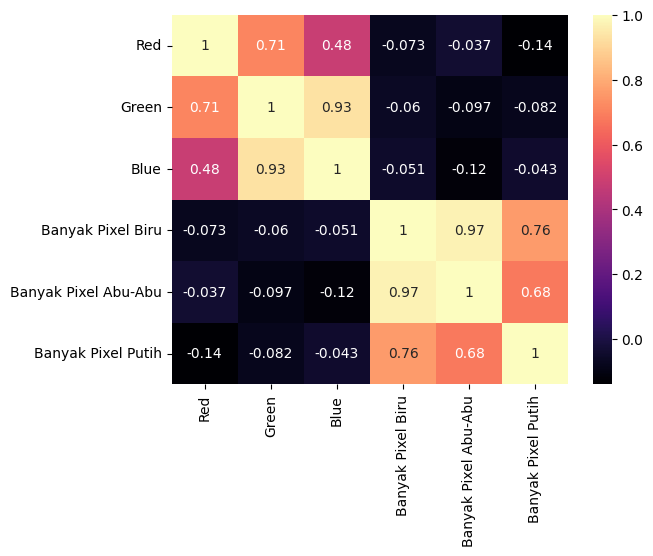

In [4433]:
sns.heatmap(cloud_data_train.corr(numeric_only=True), cmap="magma", annot=True )
plt.show()

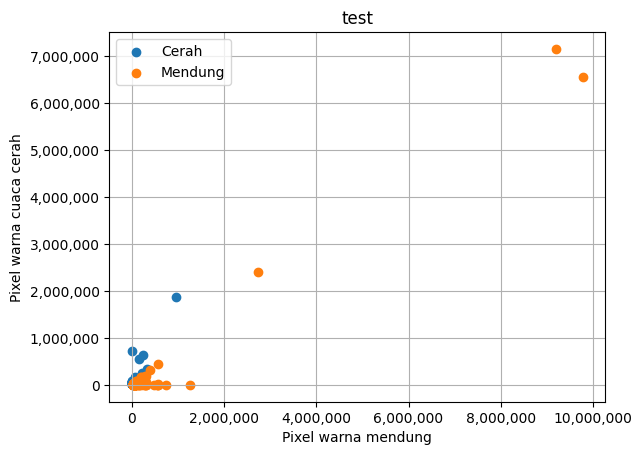

0        26463
1         2221
5           17
6        23088
11     2407879
        ...   
239          0
243      64754
244     174423
245       2839
247          0
Length: 124, dtype: int64


In [4434]:
from matplotlib.ticker import FuncFormatter

figure, ax = plt.subplots()
n_data = 0
lots_of_pixel = 0
for weather, data in cloud_data_train.groupby('Kondisi Cuaca'):
  # lots_of_pixel
  lots_of_pixel = data[['Banyak Pixel Biru', 'Banyak Pixel Putih']].max(axis=1)

  
  ax.scatter(data['Banyak Pixel Abu-Abu'], lots_of_pixel, label=weather )

  n_data += 1

formatter = FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)


plt.legend(loc='upper left')
plt.title("test")
plt.xlabel("Pixel warna mendung")
plt.ylabel("Pixel warna cuaca cerah")
plt.grid(True)
plt.show()

print(lots_of_pixel)



In [4435]:

def get_Nan_value(data):

  Nan_value = data.isna().sum()
  filter_nan = Nan_value[Nan_value > 0]

  return filter_nan

In [4436]:
get_Nan_value(cloud_data_train)

Series([], dtype: int64)

In [4437]:
def clean_data(data):
  data = data.drop(["Nama File", "Waktu"], axis=1)
  nan_columns = get_Nan_value(data)

 
  for Nan_column in  nan_columns.index.tolist():
    if data[Nan_column].dtype != 'int64' and data[Nan_column].dtype != 'float64':
      data[Nan_column] = data[Nan_column].fillna("U")


    else:
        data[Nan_column] = data[Nan_column].fillna(data[Nan_column].median())

  max_values = data[['Banyak Pixel Biru', 'Banyak Pixel Putih']].max(axis=1)
  data.insert(5, 'Maks Pixel Antara Putih dan Biru', max_values)

  # data['Kombinasi'] = max_values
  data.drop(columns=['Banyak Pixel Biru', 'Banyak Pixel Putih'], inplace=True)

  return data

In [4438]:
data_train = clean_data(cloud_data_train)
data_test = clean_data(cloud_data_test)

# data_train.head(5)
data_test.head(5)

,Red,Green,Blue,Banyak Pixel Abu-Abu,Maks Pixel Antara Putih dan Biru
0,84,119,159,117051,249645
1,83,118,158,116161,248769
2,83,112,148,140955,203974
3,83,112,148,141159,202890
4,83,112,148,141992,202640


In [4439]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


cols = ["Kondisi Cuaca"]
for col_name in cols:
  data_train[col_name] = label_encoder.fit_transform(data_train[col_name])
data_train.head(10)

,Red,Green,Blue,Banyak Pixel Abu-Abu,Maks Pixel Antara Putih dan Biru,Kondisi Cuaca
0,74,116,138,32411,26463,1
1,114,122,129,25575,2221,1
2,48,104,182,1172,42471,0
3,85,134,189,4726,33918,0
4,114,160,230,33,31321,0
5,96,95,90,572659,17,1
6,92,99,118,43065,23088,1
7,84,123,184,5889,36046,0
8,117,170,218,57,23726,0
9,106,130,181,234777,632351,0


In [4440]:
from sklearn.model_selection import train_test_split




# Tampilkan DataFrame setelah penambahan kolom baru


y = data_train["Kondisi Cuaca"]
x = data_train.drop("Kondisi Cuaca", axis=1)


x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.4, random_state=52)
data_train

x


,Red,Green,Blue,Banyak Pixel Abu-Abu,Maks Pixel Antara Putih dan Biru
0,74,116,138,32411,26463
1,114,122,129,25575,2221
2,48,104,182,1172,42471
3,85,134,189,4726,33918
4,114,160,230,33,31321
...,...,...,...,...,...
493,104,134,174,26809,36259
494,104,134,174,26809,36259
495,104,134,174,26809,36259
496,104,134,174,26809,36259


In [4441]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [4442]:
prediction = model.predict(x_train)
np.sum(prediction == y_train) / len(y_train)

0.9932885906040269

In [4443]:
result_predection = model.predict(data_test)

result_labels = np.where(result_predection == 1, 'Mendung', 'Cerah')


In [4444]:
test_file_Name = cloud_data_test["Nama File"]
print(test_file_Name)

df = pd.DataFrame({"Nama File": test_file_Name.values,
                   "Kondisi Cuaca": result_labels })

0       Frame_1.jpg
1      Frame_10.jpg
2     Frame_100.jpg
3     Frame_101.jpg
4     Frame_102.jpg
5     Frame_103.jpg
6     Frame_104.jpg
7     Frame_105.jpg
8     Frame_106.jpg
9     Frame_107.jpg
10    Frame_108.jpg
11    Frame_109.jpg
12     Frame_11.jpg
13    Frame_110.jpg
14    Frame_111.jpg
15    Frame_112.jpg
16    Frame_113.jpg
17    Frame_114.jpg
18    Frame_115.jpg
19    Frame_116.jpg
20    Frame_117.jpg
21    Frame_118.jpg
22    Frame_119.jpg
23     Frame_12.jpg
24    Frame_120.jpg
25    Frame_121.jpg
26    Frame_122.jpg
27    Frame_123.jpg
28    Frame_124.jpg
29    Frame_125.jpg
30    Frame_126.jpg
31    Frame_127.jpg
32    Frame_128.jpg
33    Frame_129.jpg
34     Frame_13.jpg
35    Frame_130.jpg
36    Frame_131.jpg
37    Frame_132.jpg
38    Frame_133.jpg
39    Frame_134.jpg
40    Frame_135.jpg
41    Frame_136.jpg
42    Frame_137.jpg
43    Frame_138.jpg
44    Frame_139.jpg
45     Frame_14.jpg
46    Frame_140.jpg
47    Frame_141.jpg
48    Frame_142.jpg
Name: Nama File, dty

In [4445]:
df.to_csv("result.csv", index=False)